In [30]:
import sys
sys.path.append("../lropy")

%load_ext autoreload
%autoreload complete

In [33]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator
import pandas as pd
import numpy as np
import seaborn as sb
import spiceypy as spice
import pickle

from datetime import datetime, timedelta
from pathlib import Path

In [34]:
# from spice_tools import as_et, as_utc, as_tdb, generate_lro_ephemeris
from lropy.analysis.io import load_simulation_results, pos_names, acc_names, irr_names, panels_count_names, load_pickled_simulation_results
from lropy.analysis.plotting import format_plot, save_plot
# from util import spher2cart, cart2spher, align_vectors

In [4]:
moon_polar_radius = 1736  # km
earth_radius = 6378  # km

In [5]:
results_folder_contribs = Path("../results/albedo_thermal_test-2023-07-19T00-06-24-aaac6")  # geometric areas, contains Aug 4
metadata_contribs, runs_contribs = load_pickled_simulation_results(results_folder_contribs)

def get_contrib_run(albedo, thermal, target_type, start_date):
    for date in metadata_contribs["simulation_start"].unique():
        if date.startswith(start_date):
            start_date = date
            break

    idx = metadata_contribs[
        (metadata_contribs["albedo_distribution_moon"] == albedo) &
        (metadata_contribs["thermal_type_moon"] == thermal) &
        (metadata_contribs["target_type"] == target_type) &
        (metadata_contribs["simulation_start"] == start_date)
    ]
    if len(idx.index) > 1:
        raise ValueError("More than one run found")
    return runs_contribs[idx.index[0]]

In [6]:
# {6, 12} constant radiosity, paneled target, with occ
df1 = load_simulation_results(Path("../results/2023-07-19T10-44-07-c1829"), do_tf=True)

In [7]:
# {6, 12} constant radiosity, cannonball target, with occ
df2 = load_simulation_results(Path("../results/2023-07-19T11-01-35-b120c"), do_tf=True)

In [8]:
# {6, 12} constant radiosity, cannonball target, without occ
df3 = load_simulation_results(Path("../results/2023-07-19T11-03-19-19192"), do_tf=True)

In [9]:
# {6, 12} constant radiosity, paneled target, without occ
df4 = load_simulation_results(Path("../results/2023-07-19T11-08-25-a292b"), do_tf=True)

In [10]:
# 40000 constant radiosity, paneled target, without occ
df5 = load_simulation_results(Path("../results/2023-07-19T11-29-05-af1b0"), do_tf=True)

In [11]:
# {6, 12} constant radiosity, paneled target, without occ, no tracking
df6 = load_simulation_results(Path("../results/2023-07-19T11-39-31-17329"), do_tf=True)

In [12]:
# {6, 12} constant radiosity, paneled target, without occ, constant rotation in ECLIPJ20000
df7 = load_simulation_results(Path("../results/2023-07-19T11-54-40-d8601"), do_tf=True)

In [13]:
# 70000 constant radiosity, paneled target, without occ
df8 = load_simulation_results(Path("../results/2023-07-19T11-56-29-31a15"), do_tf=True)

In [14]:
# {6, 12} constant radiosity, paneled target, without occ, dynamic panels from 20000 static
df9 = load_simulation_results(Path("../results/2023-07-19T12-51-12-670fd"), do_tf=True)

In [15]:
# {6, 12} constant radiosity, paneled target, without occ, rotation from -UnitZ()
df10 = load_simulation_results(Path("../results/2023-07-19T13-26-27-faf16"), do_tf=True)

In [16]:
# {6, 12} constant radiosity, paneled target, without occ, no tracking, constant rotation in ECLIPJ20000
df11 = load_simulation_results(Path("../results/2023-07-19T22-10-02-3bb88"), do_tf=True)

In [50]:
# {6, 12, 18, 24, 30, 36, 42} constant radiosity, paneled target, without occ, no tracking
df12 = load_simulation_results(Path("../results/2023-07-25T12-15-40-d6322"), do_tf=True)

In [54]:
# {6, 12, 18, 24} constant radiosity, paneled target, without occ, no tracking
df13 = load_simulation_results(Path("../results/2023-07-25T12-51-40-62313"), do_tf=True)

In [17]:
def plot_acc(df):
    fig, axs = plt.subplots(2, figsize=(12, 8))

    axs[0].plot(df.index, df["acc_rp_moon_radial"])
    axs[0].set_title("radial")

    axs[1].plot(df.index, df["acc_rp_moon_along"])
    axs[1].set_title("along")

    format_plot()

In [49]:
# plot_acc(get_contrib_run("NoAlbedo", "AngleBased", "Cannonball", "2010 JUN 26 06:00:00"))
# plot_acc(get_contrib_run("Constant", "NoThermal", "Cannonball", "2010 JUN 26 06:00:00"))

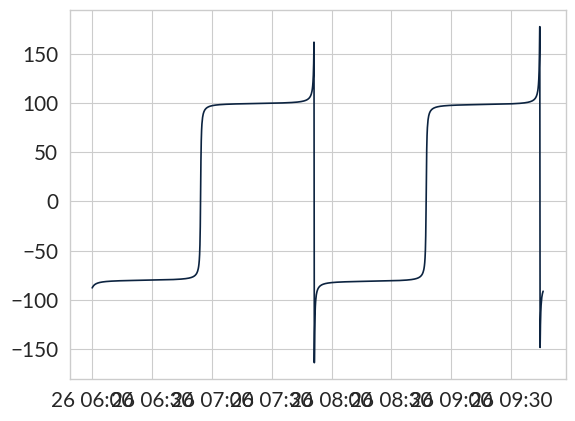

In [35]:
plt.plot(df7["lon_moon"])

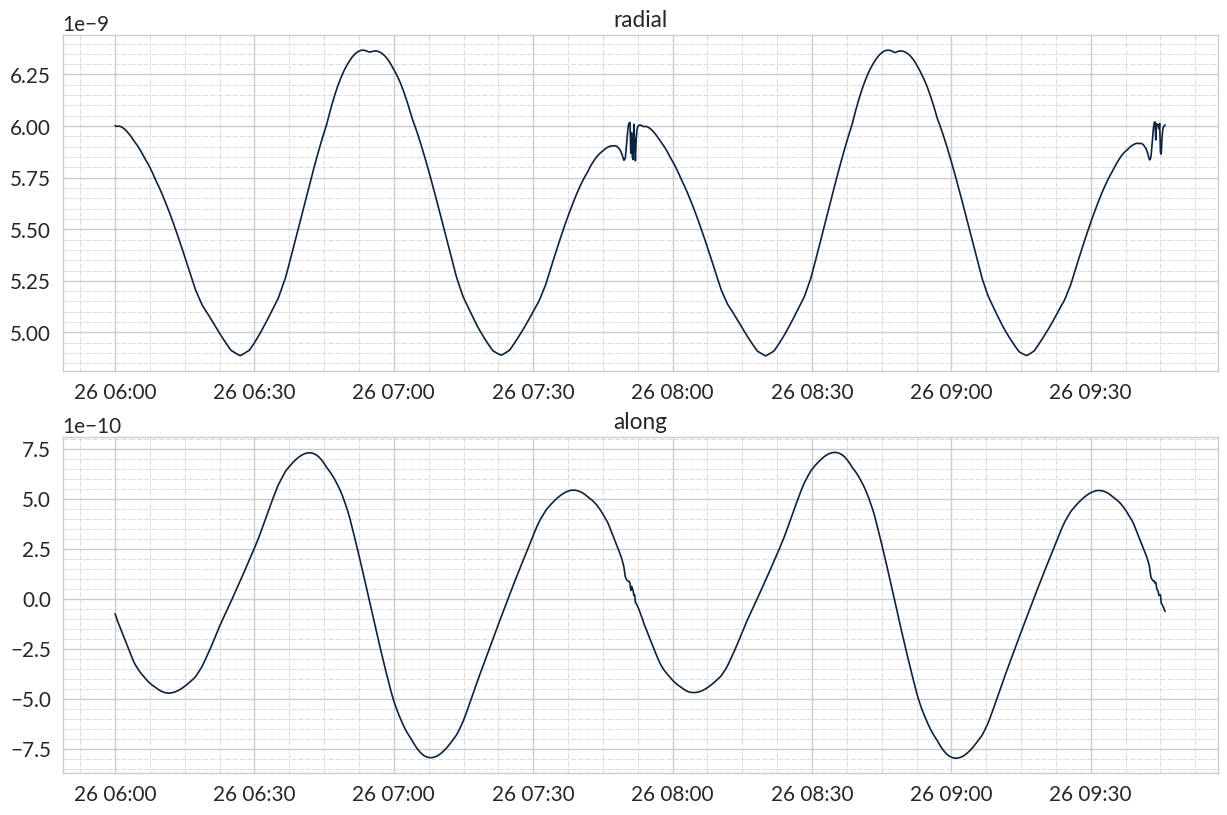

In [20]:
# constant rotation
plot_acc(df7)

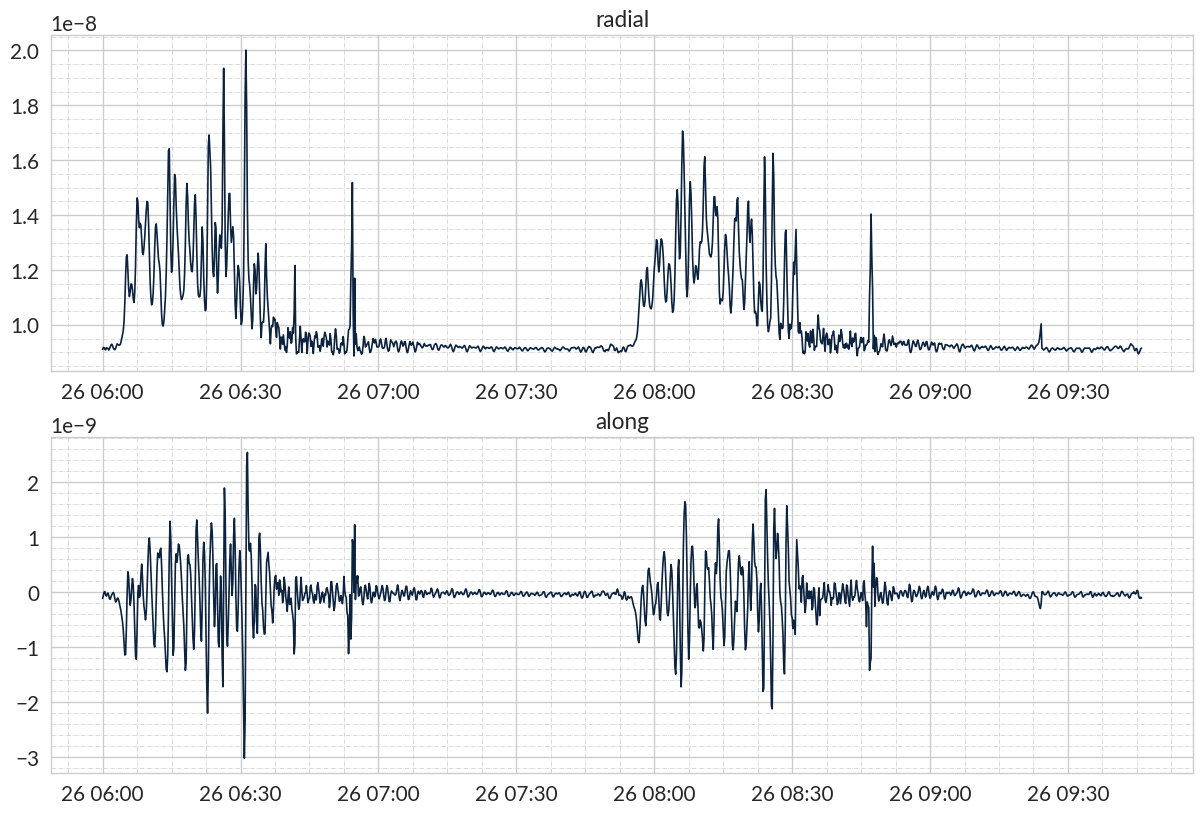

In [21]:
# dynamic panels from static
plot_acc(df9)

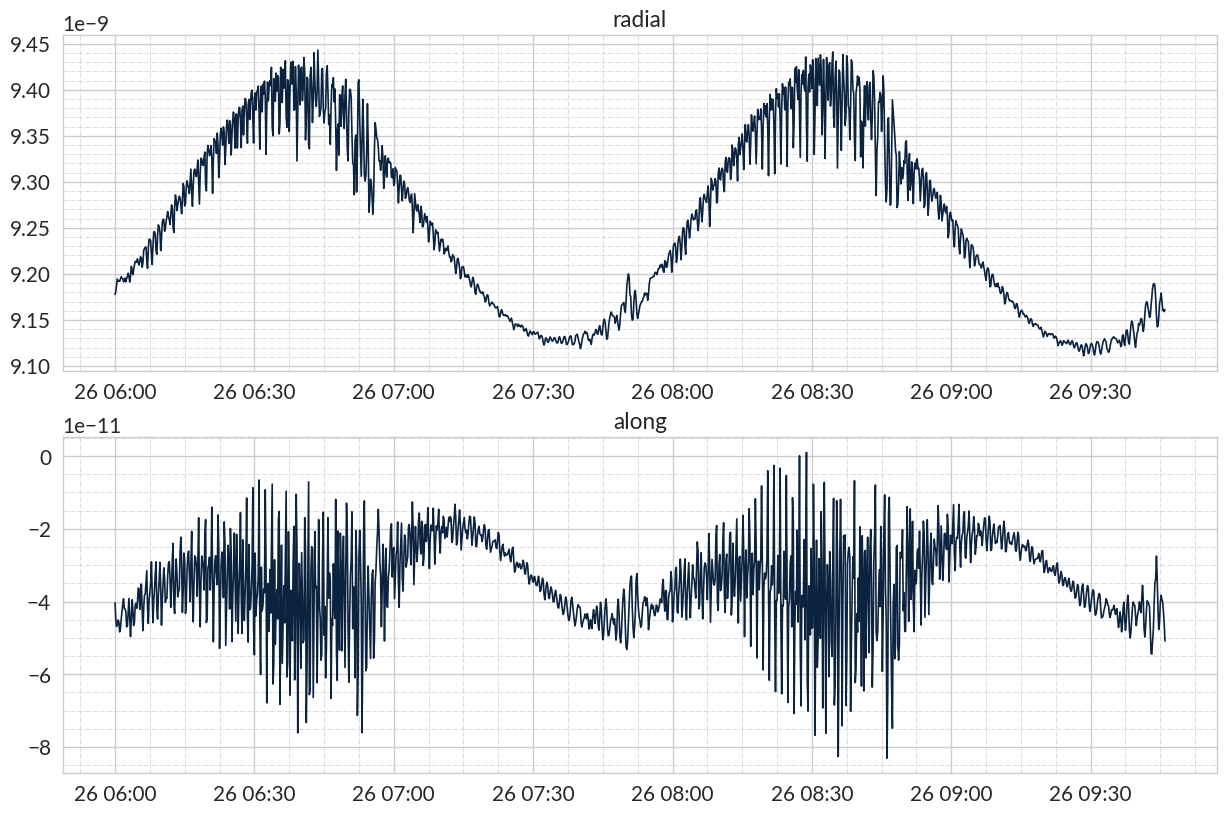

In [22]:
# static
plot_acc(df8)

(-90.0, -80.0)

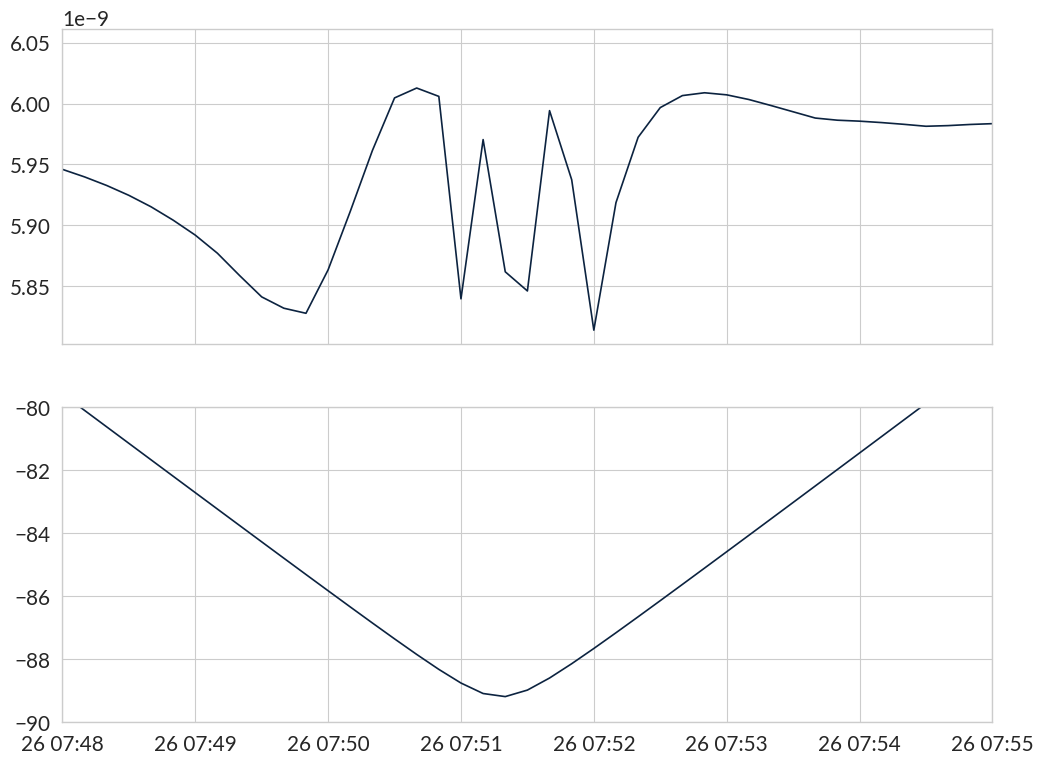

In [23]:
_, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 9), sharex="all")
ax1.plot(df4.index, df4["acc_rp_moon_radial"])
ax2.plot(df4.index, df4["lat_moon"])
ax2.set_xlim([datetime(2010, 6, 26, 7, 48), datetime(2010, 6, 26, 7, 55)])
ax2.set_ylim([-90, -80])

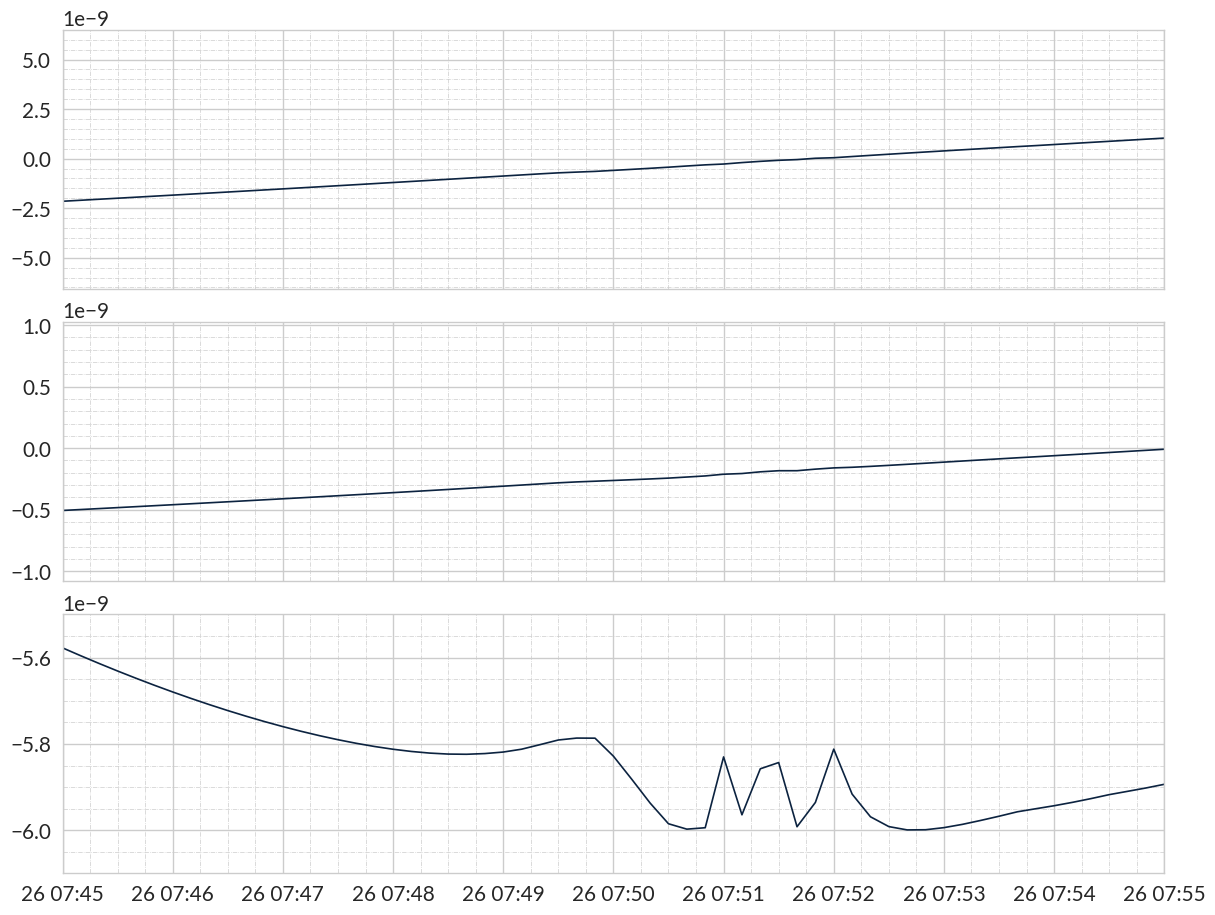

In [24]:
_, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 9), sharex="all")
ax1.plot(df4.index, df4["acc_rp_moon_x"])
ax2.plot(df4.index, df4["acc_rp_moon_y"])
ax3.plot(df4.index, df4["acc_rp_moon_z"])
ax2.set_xlim([datetime(2010, 6, 26, 7, 45), datetime(2010, 6, 26, 7, 55)])
ax3.set_ylim([-6.1e-9, -5.5e-9])
format_plot()

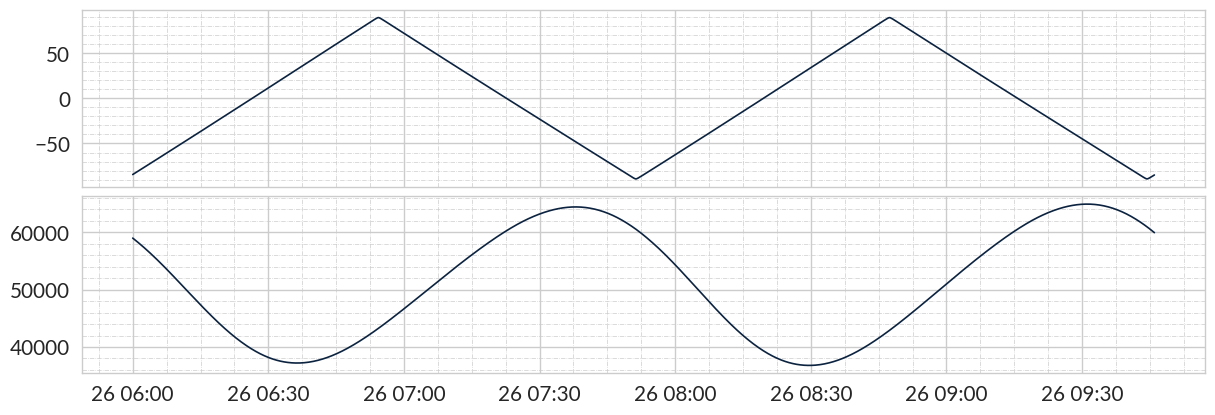

In [25]:
_, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 4), sharex="all")
ax1.plot(df4.index, df4["lat_moon"])
ax2.plot(df4.index, df4["h"])
format_plot()

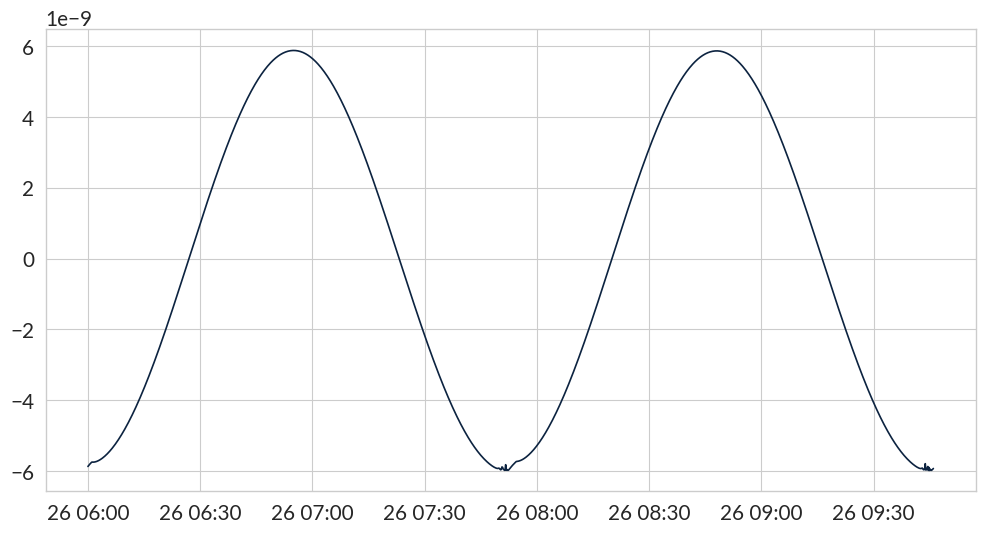

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(df4.index, df6["acc_rp_moon_z"])

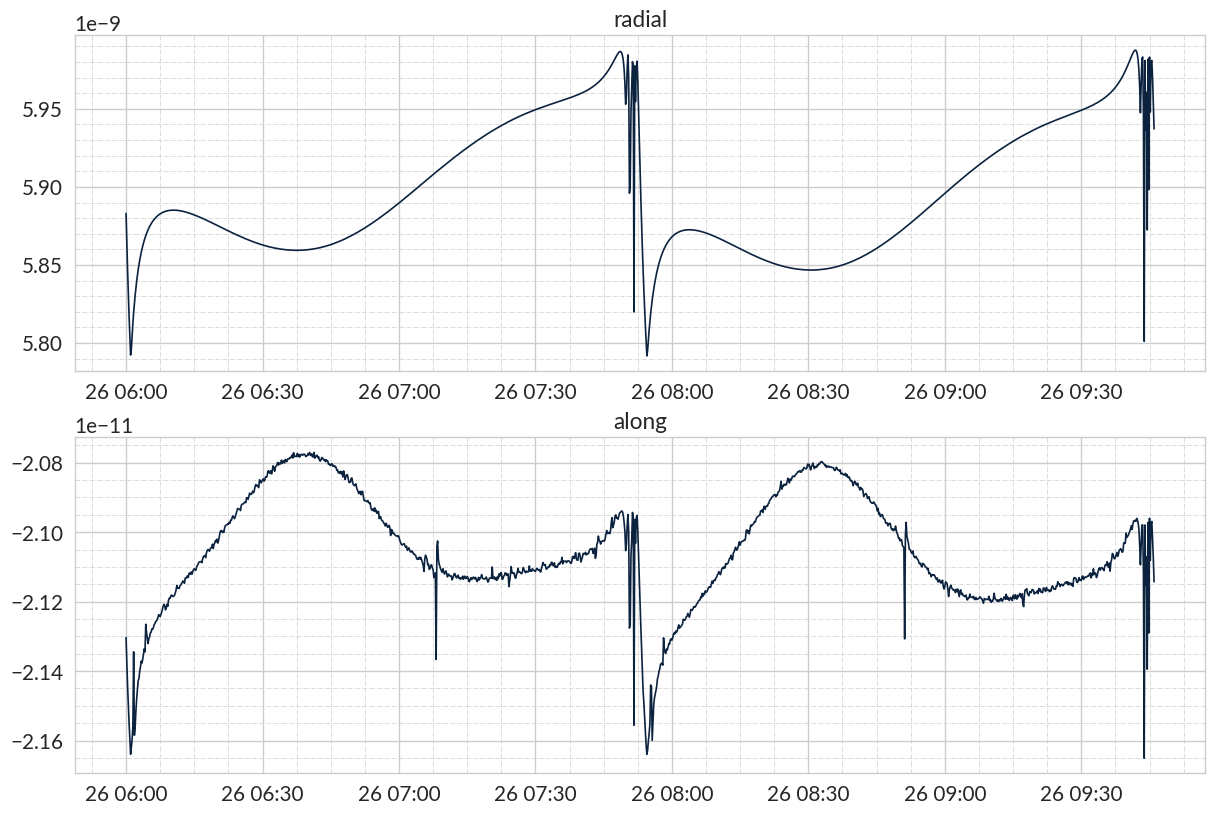

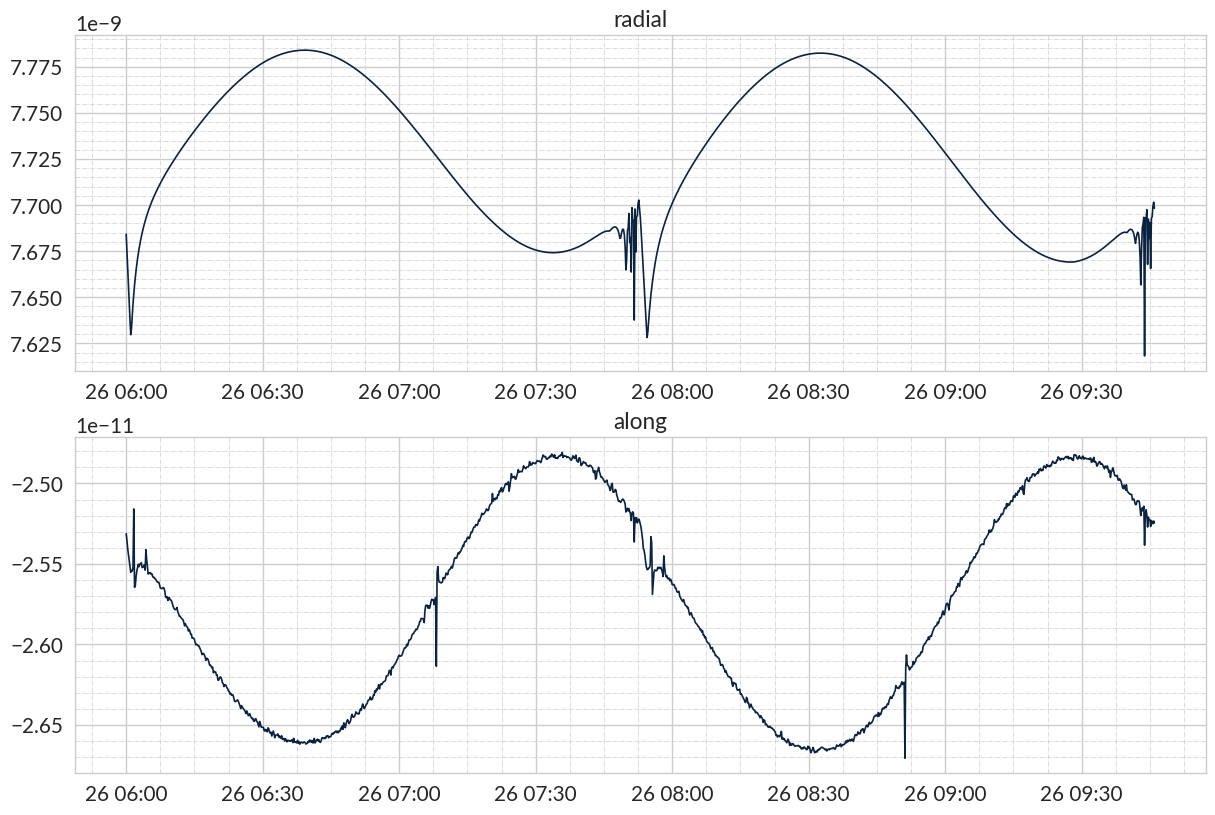

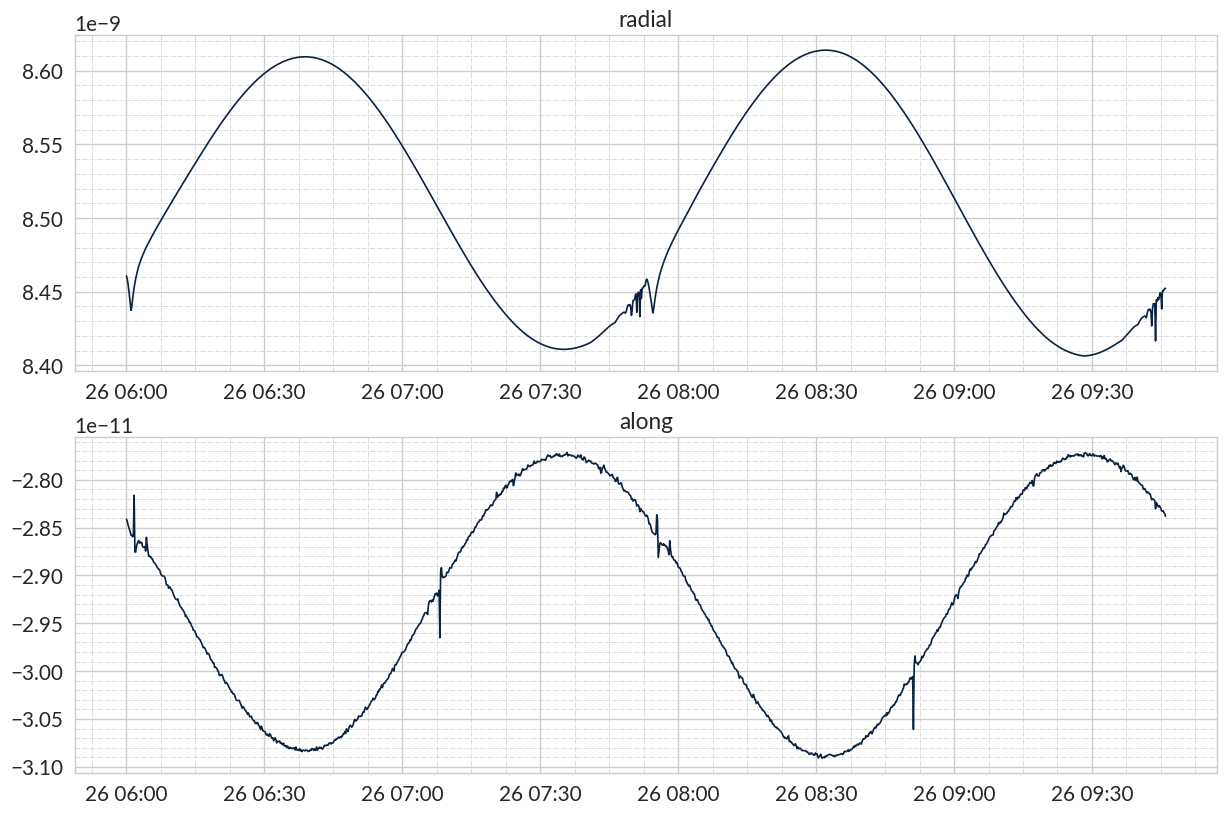

In [55]:
# no tracking, 2 rings
plot_acc(df6)
# no tracking, 4 rings
plot_acc(df13)
# no tracking, 7 rings
plot_acc(df12)

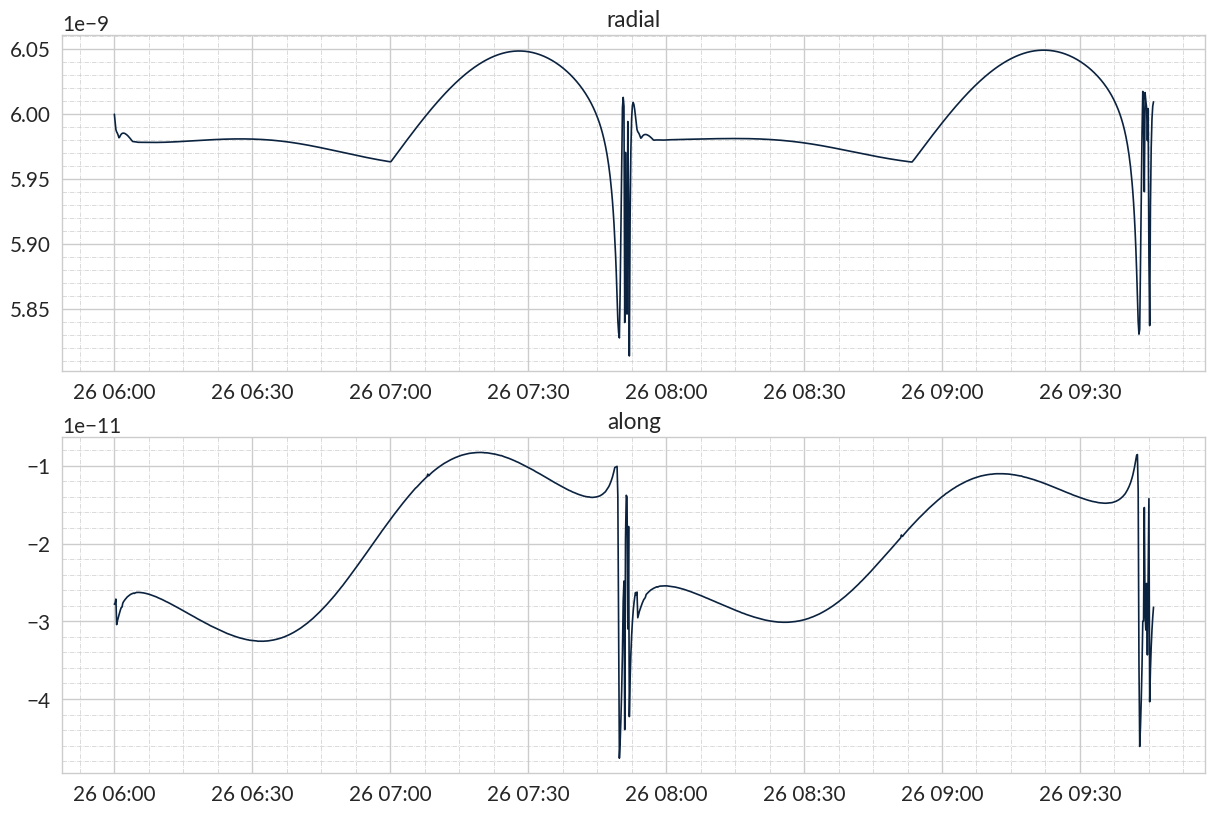

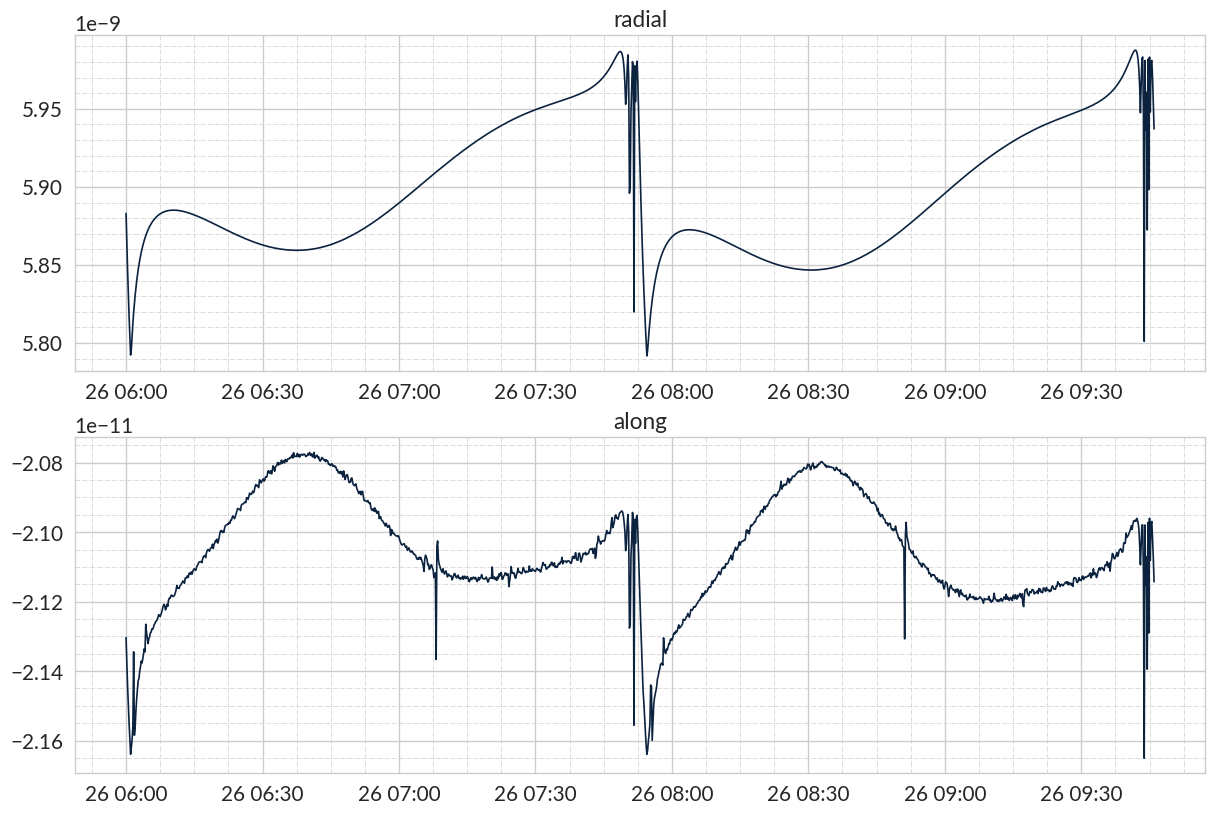

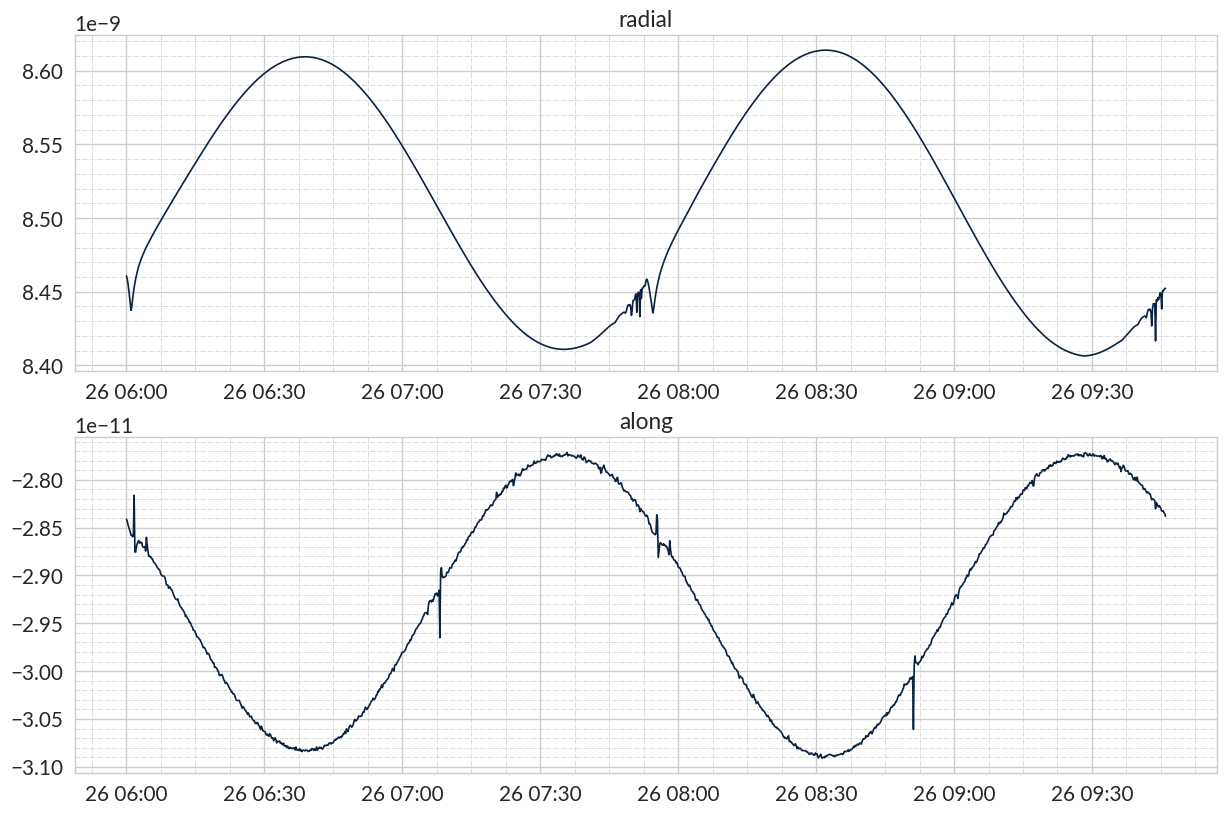

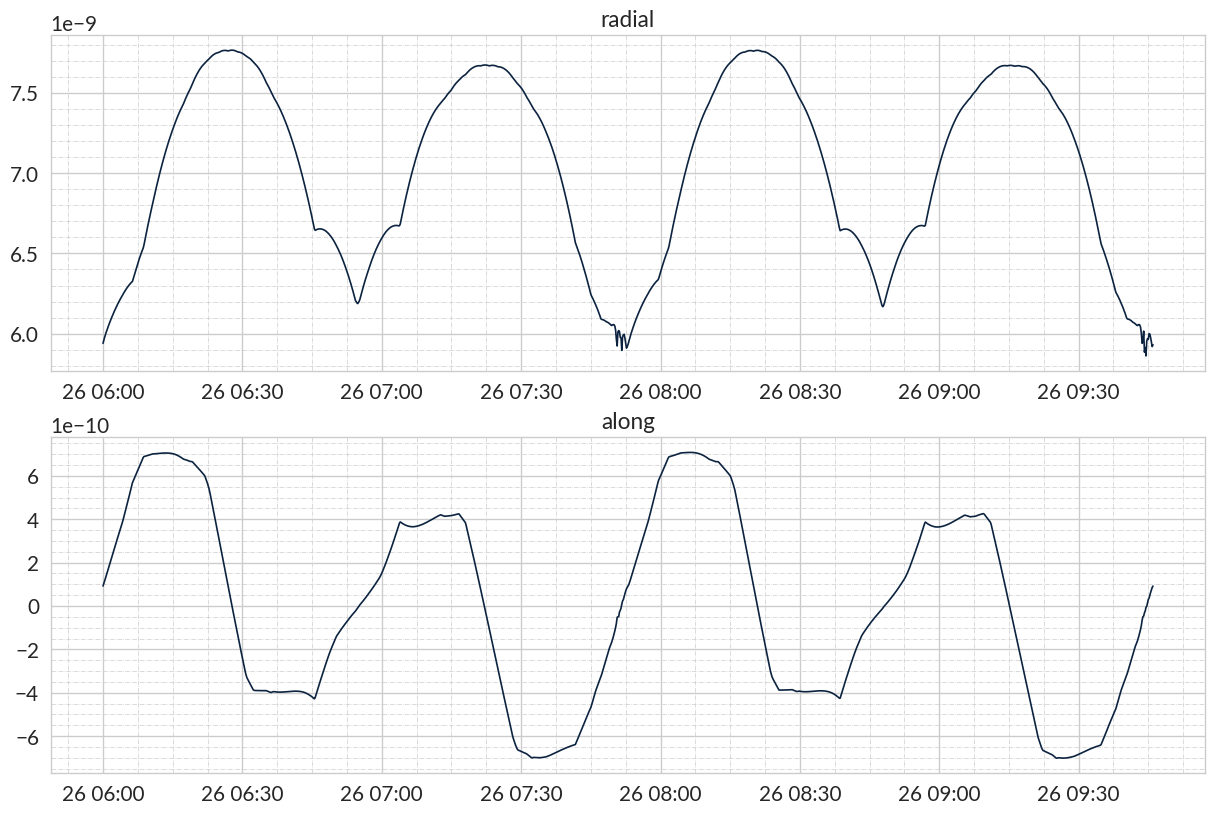

In [51]:
# tracking
plot_acc(df4)
# no tracking, 2 rings
plot_acc(df6)
# no tracking, constant rotation
plot_acc(df11)

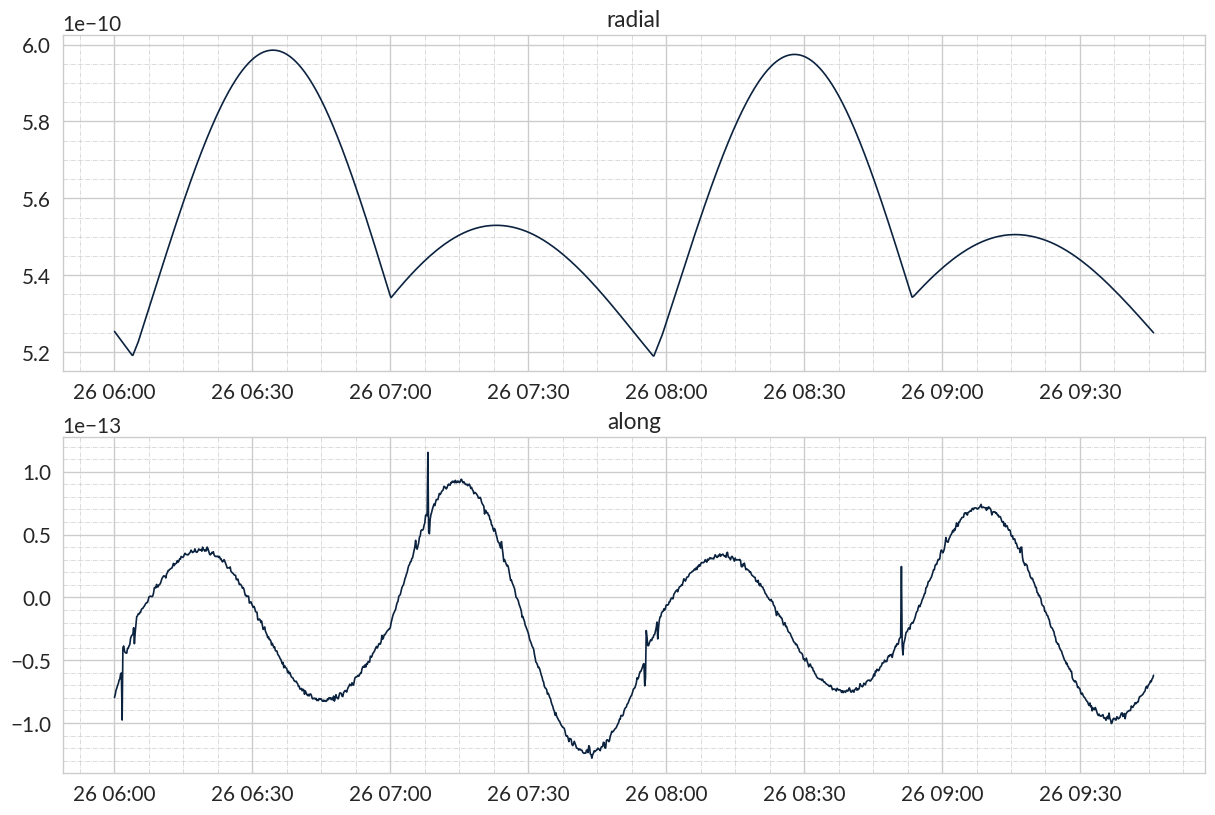

In [27]:
# rotation from -UnitZ()
plot_acc(df10)

In [28]:
def plot_all(df):
    fig, axs = plt.subplots(len(df.columns), figsize=(12, 2.5 * len(df.columns)))
    for i, col in enumerate(df.columns):
        axs[i].plot(df.index, df[col])
        axs[i].set_title(col)
    format_plot()

In [29]:
# plot_all(df4)

# Convergence

In [89]:
def plot_convergence_magnitude(path):
    metadata_rings, runs_rings = load_pickled_simulation_results(path)

    idxs = metadata_rings[
        (metadata_rings["albedo_distribution_moon"] == "DLAM1")
    ]
    dfs = {
        len(row.number_of_panels_per_ring_moon): runs_rings[row.Index] for row in idxs.itertuples()
    }
    dfs = dict(sorted(dfs.items(), key=lambda item: item[0]))
    labels, dfs = zip(*dfs.items())

    fig, ax = plt.subplots(1, 1, figsize=(12, 9), sharex="all")

    cmap = matplotlib.colormaps["Blues"](np.linspace(0.3, 1, len(dfs)))

    # idx_start = 50
    # idx_end = idx_start + 100

    for df, label, color in zip(list(dfs)[:-1], list(labels)[:-1], cmap):
        # df = df.iloc[idx_start:idx_end]
        ax.plot(df.index, df["acc_rp_moon"], label=f"{label} rings", c=color)

    ax.set_title("Acceleration")
    ax.legend()

    ax.tick_params(axis='x', labelrotation=45)
    # ax.set_ylim([min(0, ax.get_ylim()[0]), ax.get_ylim()[1]])
    
    format_plot()

### No tracking, definitive rotation

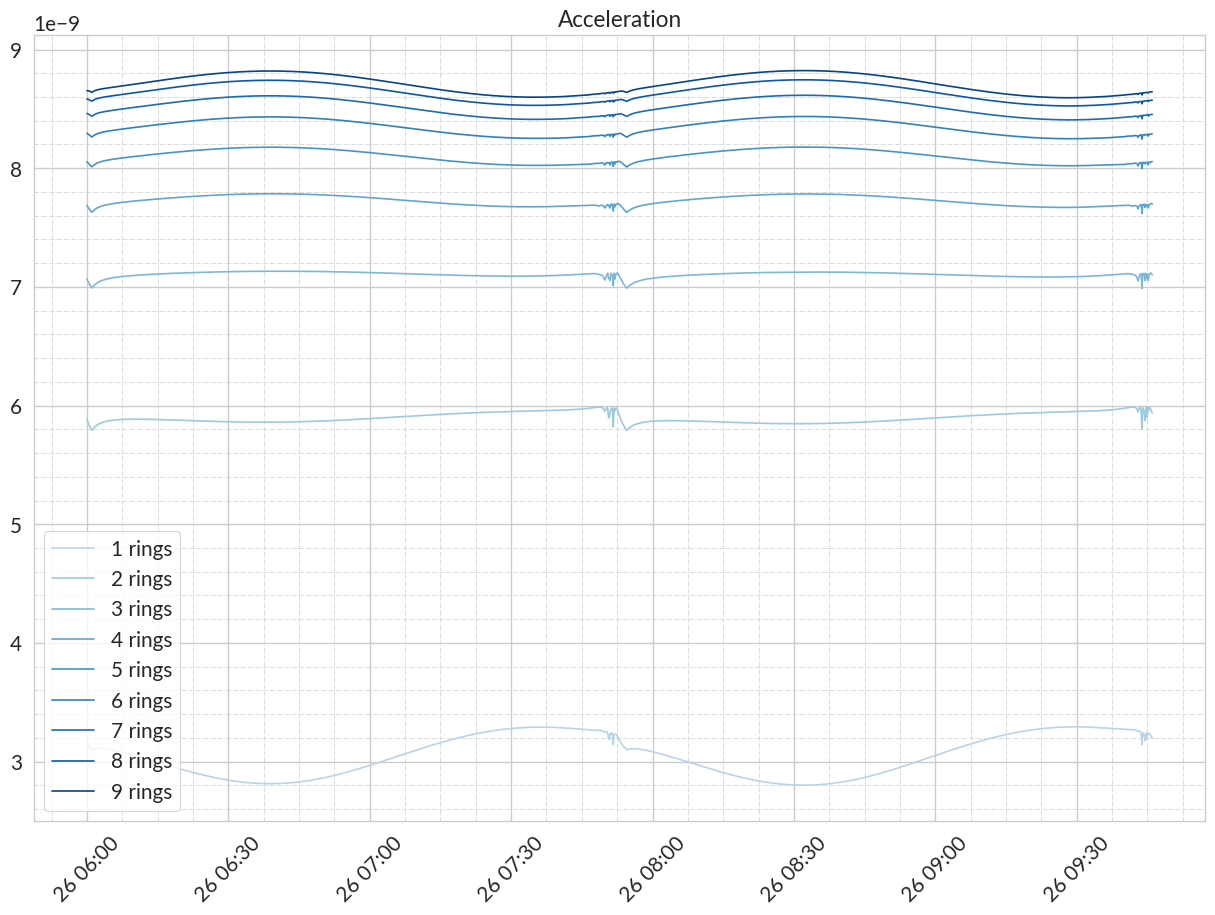

In [90]:
plot_convergence_magnitude(Path("../results/number_of_panels_per_ring_debug-2023-07-25T13-27-48-03103"))

Maybe reverses because source panels are added that illuminate the backside of target panels

### No tracking, constant rotation

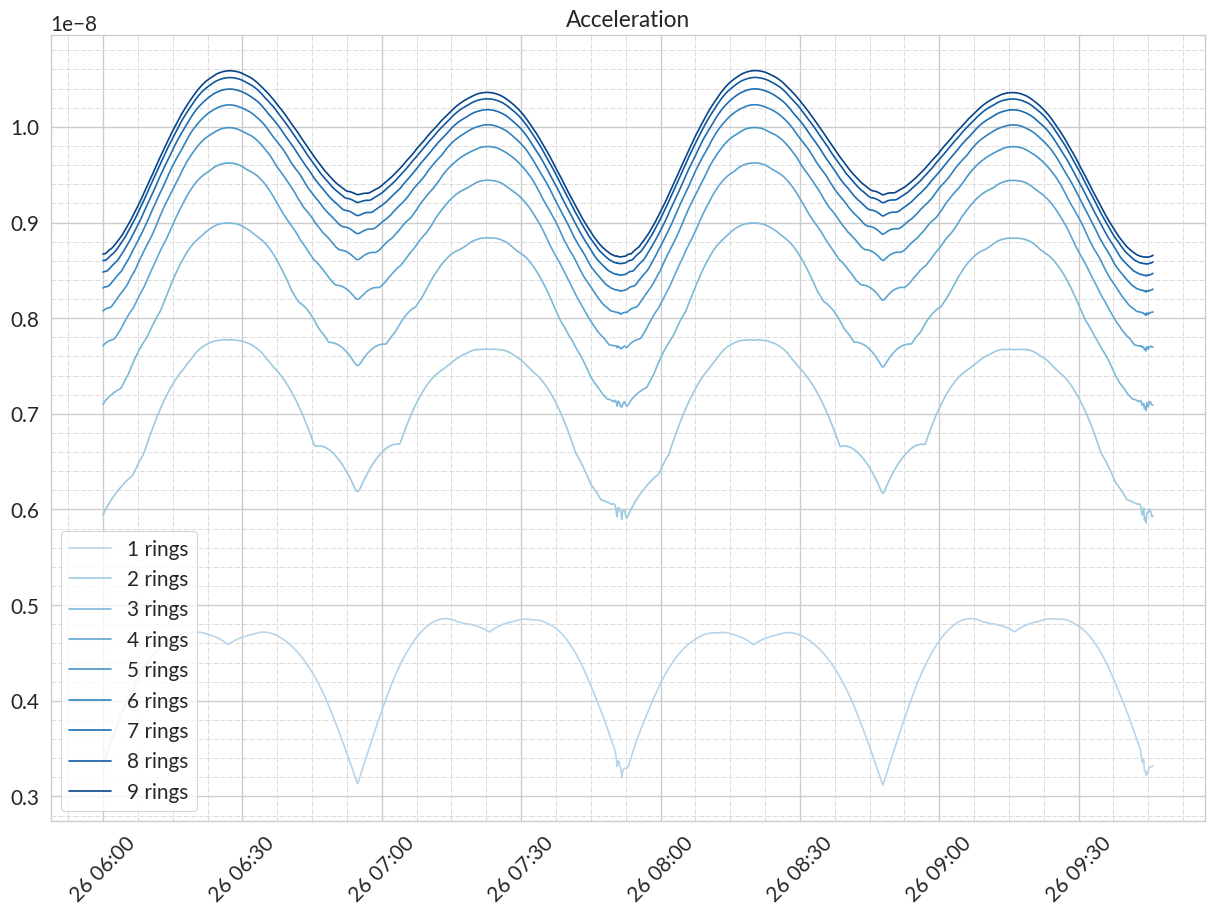

In [91]:
plot_convergence_magnitude(Path("../results/number_of_panels_per_ring_debug-2023-07-25T14-29-07-f4909"))